In [2]:
# Import package
import os
import zipfile
from shutil import copyfile
import random
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
# Check the underlying hardware devices
print(f"Does the system is built with CUDA?: {tf.test.is_built_with_cuda()}")

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# sess



Does the system is built with CUDA?: True
Default GPU Device: /device:GPU:0


In [4]:
# Process the file method(2): -----------START METHOD(2)---------
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE+filename
        if os.path.getsize(file)>0:
            files.append(filename)
        else:
            print(filename+" is zero length, so ignoring")
    # Shuffling the samples
    shuffled_set = random.sample(files, len(files))
    # Split the data in proportion of SPLIT_SIZE
    training_length = int(len(files)*SPLIT_SIZE)
    validation_length = int(len(files) - training_length)
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[-validation_length:]
    # Copy the files for training and testing dataset
    for filename in training_set:
        this_file = SOURCE+filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
    for filename in validation_set:
        this_file = SOURCE+filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)
# The Src file dir
Common_rust_src_dir = "./corn_data/Corn_(maize)___Common_rust_/"
Gray_leaf_spot_src_dir = "./corn_data/Corn_(maize)___Gray_leaf_spot/"
Healthy_src_dir = "./corn_data/Corn_(maize)___healthy/"
Northern_Leaf_Blight_src_dir = "./corn_data/Corn_(maize)___Northern_Leaf_Blight/"

# The Dest file dir
train_Common_rust_dir = "./tmp/corn/training/Common_rust/"
train_Gray_leaf_spot_dir = "./tmp/corn/training/Gray_leaf_spot/"
train_Healthy_dir = "./tmp/corn/training/healthy/"
train_Northern_Leaf_Blight_dir = "./tmp/corn/training/Northern_Leaf_Blight/"

valid_Common_rust_dir = "./tmp/corn/validation/Common_rust/"
valid_Gray_leaf_spot_dir = "./tmp/corn/validation/Gray_leaf_spot/"
valid_Healthy_dir = "./tmp/corn/validation/healthy/"
valid_Northern_Leaf_Blight_dir = "./tmp/corn/validation/Northern_Leaf_Blight/"

# Create directory
try:
    os.makedirs(train_Common_rust_dir, exist_ok=True)
    os.makedirs(train_Gray_leaf_spot_dir, exist_ok=True)
    os.makedirs(train_Healthy_dir, exist_ok=True)
    os.makedirs(train_Northern_Leaf_Blight_dir, exist_ok=True)
    os.makedirs(valid_Common_rust_dir, exist_ok=True)
    os.makedirs(valid_Gray_leaf_spot_dir, exist_ok=True)
    os.makedirs(valid_Healthy_dir, exist_ok=True)
    os.makedirs(valid_Northern_Leaf_Blight_dir, exist_ok=True)
except OSError:
    print(f"Current dir: {os.getcwd()}")
    print(f"A list of dir in '/tmp': {os.listdir('./tmp/corn')}")
    pass

# Check the file structure is valid
print("\nCheck the file structures for training and validation dir: ")
print(os.listdir('./tmp/corn/training'))
print(os.listdir('./tmp/corn/validation'))

# Split the dataset
split_size = .9
split_data(Common_rust_src_dir, train_Common_rust_dir, valid_Common_rust_dir, split_size)
split_data(Gray_leaf_spot_src_dir, train_Gray_leaf_spot_dir, valid_Gray_leaf_spot_dir, split_size)
split_data(Healthy_src_dir, train_Healthy_dir, valid_Healthy_dir, split_size)
split_data(Northern_Leaf_Blight_src_dir, train_Northern_Leaf_Blight_dir, valid_Northern_Leaf_Blight_dir, split_size)


Check the file structures for training and validation dir: 
['Common_rust', 'Gray_leaf_spot', 'healthy', 'Northern_Leaf_Blight']
['Common_rust', 'Gray_leaf_spot', 'healthy', 'Northern_Leaf_Blight']


In [4]:
# Check the first 10 images names for each dataset:
print("\nCheck the first 10 images names for each dataset: ")
train_Common_rust_names = os.listdir(train_Common_rust_dir)
print(f'train_Common_rust_names[:10]: {train_Common_rust_names[:10]}')
train_Gray_leaf_spot_names = os.listdir(train_Gray_leaf_spot_dir)
print(f'train_Gray_leaf_spot_names[:10]: {train_Gray_leaf_spot_names[:10]}')
train_Healthy_names = os.listdir(train_Healthy_dir)
print(f'train_Healthy_names[:10]: {train_Healthy_names[:10]}')
train_Northern_Leaf_Blight_names = os.listdir(train_Northern_Leaf_Blight_dir)
print(f'train_cats_names[:10]: {train_Northern_Leaf_Blight_names[:10]}')

valid_Common_rust_names = os.listdir(valid_Common_rust_dir)
print(f'valid_Common_rust_names[:10]: {valid_Common_rust_names[:10]}')
valid_Gray_leaf_spot_names = os.listdir(valid_Gray_leaf_spot_dir)
print(f'valid_Gray_leaf_spot_names[:10]: {valid_Gray_leaf_spot_names[:10]}')
valid_Healthy_names = os.listdir(valid_Healthy_dir)
print(f'valid_Healthy_names[:10]: {valid_Healthy_names[:10]}')
valid_Northern_Leaf_Blight_names = os.listdir(valid_Northern_Leaf_Blight_dir)
print(f'valid_Northern_Leaf_Blight_names[:10]: {valid_Northern_Leaf_Blight_names[:10]}')

# Check the total number of pictures in each dataset
print("\nCheck the total number of pictures in each dataset: ")
print('total training Common_rust images:', len(train_Common_rust_names))
print('total training Gray_leaf_spot images:', len(train_Gray_leaf_spot_names))
print('total training Healthy images:', len(train_Healthy_names))
print('total training Northern_Leaf_Blight images:', len(train_Northern_Leaf_Blight_names))

print('total validation Common_rust images:', len(valid_Common_rust_names))
print('total validation Gray_leaf_spot images:', len(valid_Gray_leaf_spot_names))
print('total validation Healthy images:', len(valid_Healthy_names))
print('total validation Northern_Leaf_Blight images:', len(valid_Northern_Leaf_Blight_names))
# Expected output:
# total training Common_rust images: 1072
# total training Gray_leaf_spot images: 458
# total training Healthy images: 1042
# total training Northern_Leaf_Blight images: 882
# total validation Common_rust images: 120
# total validation Gray_leaf_spot images: 51
# total validation Healthy images: 116
# total validation Northern_Leaf_Blight images: 99

 # ------------------------------END METHOD(2)-----------------------


Check the first 10 images names for each dataset: 
train_Common_rust_names[:10]: ['RS_Rust 1563.JPG', 'RS_Rust 1564.JPG', 'RS_Rust 1565.JPG', 'RS_Rust 1567.JPG', 'RS_Rust 1568.JPG', 'RS_Rust 1569.JPG', 'RS_Rust 1570.JPG', 'RS_Rust 1571.JPG', 'RS_Rust 1572.JPG', 'RS_Rust 1574.JPG']
train_Gray_leaf_spot_names[:10]: ['0140764c-6157-4995-9ada-9c10b81af3b8___RS_GLSp 4378.JPG', '0157de0c-5b81-44a1-abe8-eecaa6f1261a___RS_GLSp 4287.JPG', '01a02916-5d4c-4256-936b-6b1a9ee65b11___RS_GLSp 9276.JPG', '02e6c80d-c86f-44ca-9d4c-4b100f92a839___RS_GLSp 4631.JPG', '038464d1-47a9-4169-afb1-72c87e568a95___RS_GLSp 4480.JPG', '045080ca-8b98-4320-adcc-e431f88c1aaa___RS_GLSp 7313.JPG', '05daf90f-9100-499f-a4aa-ebc5dfc20adf___RS_GLSp 7335.JPG', '05f92471-3cd4-441b-af21-1a02304d0b6c___RS_GLSp 7315.JPG', '0657e6c0-5a6d-4ef3-807a-4e31e57fb683___RS_GLSp 7344 copy.jpg', '065fe7da-dcaf-41be-9332-5ec5ebceb94b___RS_GLSp 9337.JPG']
train_Healthy_names[:10]: ['00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jp

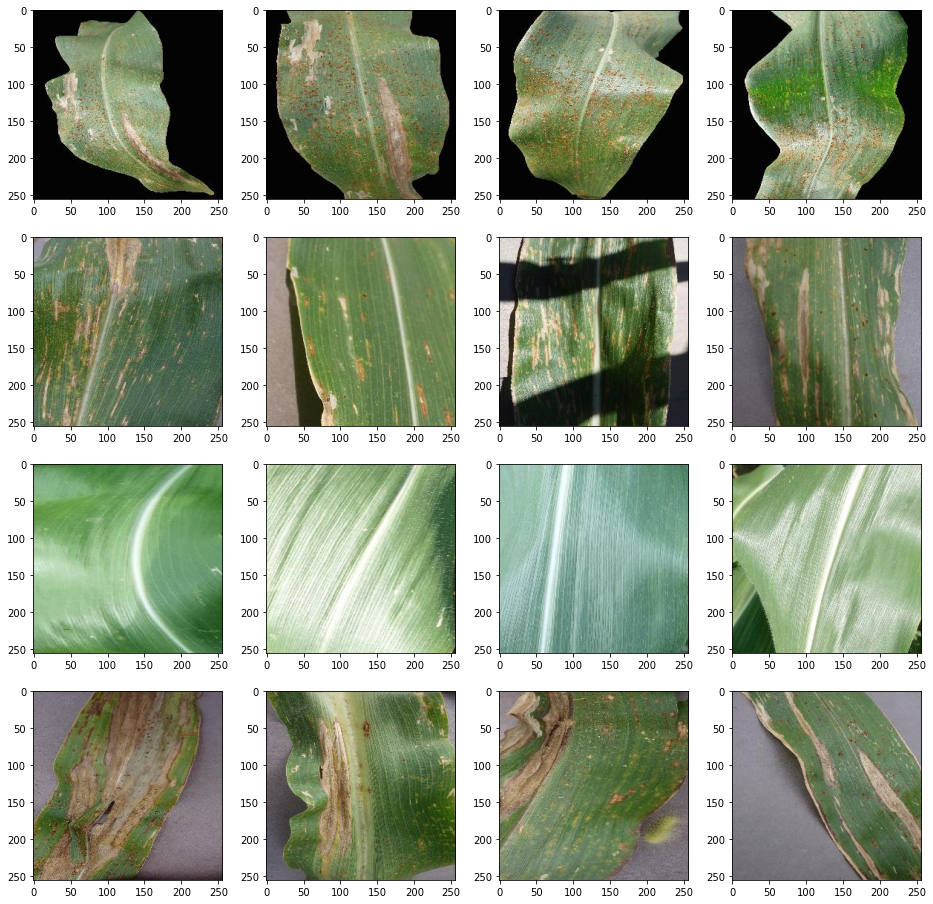

In [5]:
# Visualize the data/images
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrow = 4
ncol = 4
pic_index = 0
# Set up matplotlib figure, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncol*4, nrow*4)
# Take 8 images from each dataset, store as a list, and print to output
pic_index += 4
next_Common_rust_pix = [os.path.join(train_Common_rust_dir , fname) for fname in train_Common_rust_names[pic_index-4:pic_index]]
next_Gray_leaf_spot_pix = [os.path.join(train_Gray_leaf_spot_dir  , fname) for fname in train_Gray_leaf_spot_names[pic_index-4:pic_index]]
next_Healthy_pix = [os.path.join(train_Healthy_dir  , fname) for fname in train_Healthy_names[pic_index-4:pic_index]]
next_Northern_Leaf_Blight_pix = [os.path.join(train_Northern_Leaf_Blight_dir  , fname) for fname in train_Northern_Leaf_Blight_names[pic_index-4:pic_index]]
# print(next_horse_pix)
# print(next_human_pix)
for i, img_path in enumerate(next_Common_rust_pix+next_Gray_leaf_spot_pix+next_Healthy_pix+next_Northern_Leaf_Blight_pix):
    # Moving subplot index(subplot indices start at 1)
    sp = plt.subplot(nrow, ncol, i + 1)
    # sp.axis('Off') # Don't show axes (or gridlines)
    # Display the images
    img = mpimg.imread(img_path)
    plt.imshow(img)
# plt.show()

In [11]:
# Defines callbacks function: Method (1): Early stopping
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training=True
callbacks = myCallback()

In [ ]:
# Defines callbacks function: Method (2): Checkpoint callback
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# Defines callbacks function: Method (3): TensorBoard
import os
root_lodir = os.path.join(os.curdir, 'my_logs')
print(root_lodir)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_lodir, run_id)
run_logdir = get_run_logdir()
tensorboard_callBack = tf.keras.callbacks.TensorBoard(run_logdir)
# history = model.fit(
#     ...
#     callbacks=[tensorboard_callBack]
# )


In [5]:
# Setting up the ImageGenerator
INIT_LR = 1e-3
batch_size = 20
epochs = 15
IMG_HEIGHT = 28
IMG_WIDTH = 28
channel = 1
train_dir = './tmp/corn/training'
valid_dir = './tmp/corn/validation'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Resacle the images by 1./255 (More detail reference: https://keras.io/api/preprocessing/image/#load_img-function)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    class_mode='categorical',
    # Number of samples per gradient update. If unspecified, batch_size will default to 32.
    batch_size=32
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32
)
# Expected Output:
# Found 3454 images belonging to 4 classes.
# Found 386 images belonging to 4 classes.

Found 3454 images belonging to 4 classes.
Found 386 images belonging to 4 classes.


In [ ]:
# Apply Transfer learning on pretrain model InceptionV3:
# Download the weight for pre_trained_model
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O ./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = './tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
# Instantiate InceptionV3 model
# @include_top: Boolean, whether to include the fully-connected layer at the top, as the last layer of the network. Default to `True`.
# @weights: One of `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded. Default to `imagenet`.
pre_trained_model = InceptionV3(input_shape=(256,256,3),
                                 include_top = False, # Specifies don't include the last several fully-connected layers
                                 weights = 'imagenet') # Specify don't use the build-in weights bu the weight previously downloaded, default use 'imagenet'
# Load the weights from previously downloaded file
# pre_trained_model.load_weights(local_weights_file)
# Lock each layer in pre_trained_model
for layer in pre_trained_model.layers:
    layer.trainable = False
# Inspect the model
# pre_trained_model.summary()
# Specifies the layer we want to use as the last layer
last_layer = pre_trained_model.get_layer('mixed7')
# Inspect that layer
last_output = last_layer.output
print(f'The output of last layer: {last_output}')
print(f'last layer output shape: {last_layer.output_shape}')
# Expected:
# The output of last layer: Tensor("mixed7/concat_2:0", shape=(None, 7, 7, 768), dtype=float32)
# last layer output shape: (None, 7, 7, 768)

# Fine tuning the model: Define the new model by adding extra fully connected layers
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='elu')(x)
output_layer = tf.keras.layers.Dense(4, activation='softmax')(x)
# Instantiate the Model object
model = tf.keras.Model(inputs=pre_trained_model.input, outputs=output_layer)
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])
# model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
#               loss='categorical_crossentropy',
#               metrics=['acc'])
# model.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 25),
#               metrics=['acc'])
# loss = 'sparse_categorical_crossentropy',
# Training the model
history = model.fit(
    train_generator,
    epochs=50,
    verbose=1, # 0 = silent, 1 = progress bar, 2 = one line per epoch.
    callbacks=[callbacks],
    validation_data = validation_generator)


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 127, 127, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 127, 127, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

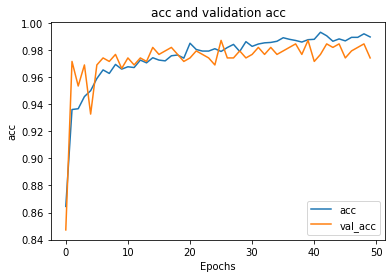

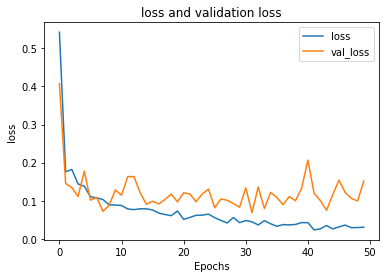

In [10]:
# Visualize the performance (1):
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(f"{string} and validation {string}")
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [8]:
# Visualizing the performance method (2):
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

NameError: name 'history' is not defined

In [ ]:
# Evaluate the model
print("Evaluation Result: ")
# model.evaluate(x_test, y_test)
# Or with 'generator'
model.evaluate(validation_generator)

In [13]:
# Save the model
model.save('./Result/inception_v3_0001.h5')

In [6]:
test_dir = "./corn_data/testing_for_evaluate/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    class_mode='categorical'
)

Found 16 images belonging to 4 classes.


In [13]:
# Loading models
model = tf.keras.models.load_model('./Result/inception_v3_0001.h5')
# Evaluate the model
print("Evaluation Result: ")
# model.evaluate(x_test, y_test)
# Or with 'generator'
model.evaluate(test_generator)
model.evaluate(validation_generator)
model.evaluate(train_generator)
# model.summary()

Evaluation Result: 
108/108 [==============================] - 44s 408ms/step - loss: 0.0512 - acc: 0.98


[0.05120336264371872, 0.9869716167449951]

In [16]:
# Making Predictions
import numpy as np
import keras
# from keras.preprocessing import image
root_dir = "./corn_data/testing/"
classes = ["Common_rust", "Gray_leaf_spot", "Northern_Leaf_Blight", "healthy", ]
# Process file path
file_names = os.listdir(root_dir)
for file_name in file_names:
    image_dir = f"{root_dir}/{file_name}"
    # Loading the image
    img = keras.preprocessing.image.load_img(image_dir, target_size=(256, 256))
    # Process the image
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # Return View of `a` with the number of dimensions increased.
    # print(x.shape)
    x/=255.0
    images = np.vstack([x])
    # Making prediction
    result = model.predict(x)
    print(result)
    index = np.argmax(result)
    print(f"file Name: {file_name}")
    print(f" Predicted result: {classes[index]}")
    # Showing the image
    # plt.imshow(img)
    # plt.show()

[[5.0451803e-13 5.7971960e-05 9.9994206e-01 3.5312679e-15]]
file Name: 00a14441-7a62-4034-bc40-b196aeab2785___RS_NLB 3932.JPG
 Predicted result: Northern_Leaf_Blight
[[4.1330273e-12 7.0336688e-04 9.9929667e-01 9.8522265e-18]]
file Name: 00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655.JPG
 Predicted result: Northern_Leaf_Blight
[[2.3501651e-13 6.5967320e-10 1.0000000e+00 1.6416046e-15]]
file Name: 00a55069-3fa3-405b-8d87-4d3408a6ed98___RS_NLB 3645.JPG
 Predicted result: Northern_Leaf_Blight
[[6.8959515e-15 9.9999964e-01 3.1877460e-07 3.3754501e-09]]
file Name: 0a01cc10-3892-4311-9c48-0ac6ab3c7c43___RS_GLSp 9352.JPG
 Predicted result: Gray_leaf_spot
[[2.522979e-10 1.454090e-07 9.999999e-01 3.905551e-17]]
file Name: 0a11f9e8-7357-48c2-8550-daeae59a1e76___RS_NLB 3588.JPG
 Predicted result: Northern_Leaf_Blight
[[1.6021545e-12 1.0000000e+00 9.8771425e-13 4.6329505e-18]]
file Name: 0a403456-5c5e-4aad-aa89-a118175c6ddd___RS_GLSp 4501.JPG
 Predicted result: Gray_leaf_spot
[[2.3048055e-05 2

In [30]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_188 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_188 (Bat (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_189 (Bat (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0

In [12]:
# Model configuration
batch_size = 32 # related to training time (Use Strong scaling to find the best batchsize)
img_width, img_height, img_num_channels = 128, 128, 3
loss_function = 'categorical_crossentropy' # 'mean_squared_error', 'mean_absolute_error', 'binary_crossentropy', 'sparse_categorical_crossentropy'
metrics = 'accuracy' # 'precision', 'recall'
no_classes = len(os.listdir(train_dir))
no_epochs = 3
optimizer = tf.keras.optimizers.Adam(0.001) # SGD, Adagrad, RMSprop
validation_split = 0.2
verbosity = 1 # 0 = silent, 1 = progress bar, 2 = one line per epoch.
steps_per_epoch = 100 # Total number of steps for one epochs
lr = 0.0001
momentum=0.9

Epoch 1/20
108/108 [==============================] - 47s 433ms/step - loss: 0.0306 - acc: 0.9887 - val_loss: 0.0088 - val_acc: 0.99
Epoch 2/20
108/108 [==============================] - 50s 465ms/step - loss: 0.0418 - acc: 0.9881 - val_loss: 0.0063 - val_acc: 0.99
Epoch 3/20
108/108 [==============================] - 54s 500ms/step - loss: 0.0265 - acc: 0.9922 - val_loss: 0.0259 - val_acc: 0.99
Epoch 4/20
108/108 [==============================] - 57s 531ms/step - loss: 0.0395 - acc: 0.9887 - val_loss: 0.0114 - val_acc: 0.994
Epoch 5/20
108/108 [==============================] - 61s 569ms/step - loss: 0.0264 - acc: 0.9899 - val_loss: 0.0156 - val_acc: 0.997
Epoch 6/20
108/108 [==============================] - 54s 504ms/step - loss: 0.0371 - acc: 0.9884 - val_loss: 0.0077 - val_acc: 0.99
Epoch 7/20
108/108 [==============================] - 55s 512ms/step - loss: 0.0288 - acc: 0.9919 - val_loss: 0.0207 - val_acc: 0.99
Epoch 8/20
108/108 [==============================] - 56s 517ms/ste

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    epochs=20,
    verbose=1, # 0 = silent, 1 = progress bar, 2 = one line per epoch.
    callbacks=[callbacks],
    validation_data = validation_generator)

In [ ]:
# Evaluate the model
print("Evaluation Result: ")
# model.evaluate(x_test, y_test)
# Or with 'generator'
model.evaluate(validation_generator)
model.load_weights

In [ ]:
# Visualize the performance (1):
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.title(f"{string} and validation {string}")
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [ ]:
# Visualizing the performance method (2):
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 127, 127, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 127, 127, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________